In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
portfolio={'AAPL':10,'TSLA':5,'MSFT':15,'GOOGL':7}
start_date='2023-01-01'
end_date='2024-01-01'
data=yf.download(list(portfolio.keys()),start=start_date,end=end_date)['Adj Close']
data.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2023-01-03,123.904633,88.899872,236.183533,108.099998
2023-01-04,125.182602,87.862434,225.852097,113.639999
2023-01-05,123.855095,85.987083,219.158356,110.339996
2023-01-06,128.412231,87.124260,221.741211,113.059998
2023-01-09,128.937286,87.802582,223.900146,119.769997


In [17]:
current_returns=data.pct_change().dropna()
total_value=sum(portfolio[stock]*data[stock].iloc[-1] for stock in portfolio)
weights=np.array([portfolio[stock]*data[stock].iloc[-1]/total_value for stock in portfolio])
portfolio_return=np.dot(weights,current_returns.mean())*252
cov_matrix=current_returns.cov()*252
portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
portfolio_return, portfolio_volatility


(0.5391094091481795, 0.21985938981296632)

In [20]:
benchmark=yf.download('SPY',start=start_date,end=end_date)['Adj Close']
benchmark_returns=benchmark.pct_change().dropna()
benchmark_return=benchmark_returns.mean()*252
benchmark_volatility=benchmark_returns.std()*np.sqrt(252)

benchmark_return,benchmark_volatility

[*********************100%%**********************]  1 of 1 completed


(0.24821908549907892, 0.13091465282971249)

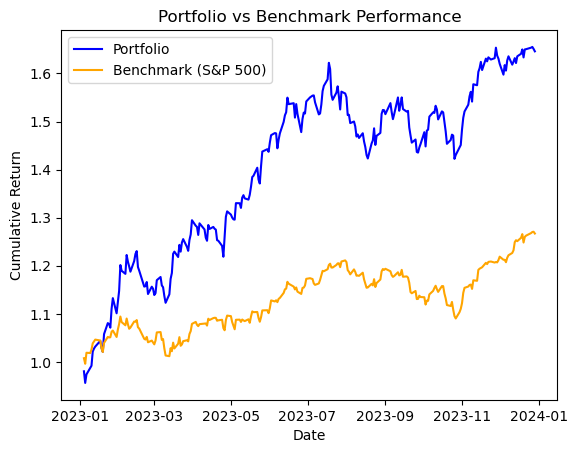

In [21]:
portfolio_cumulative=(current_returns+1).cumprod().dot(weights)
benchmark_cumulative=(benchmark_returns+1).cumprod()
plt.plot(portfolio_cumulative.index,portfolio_cumulative,label='Portfolio',color='blue')
plt.plot(benchmark_cumulative.index,benchmark_cumulative,label='Benchmark (S&P 500)',color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs Benchmark Performance')
plt.legend()
plt.show()

In [26]:
potential_assets=['NFLX','AMZN','NVDA']
potential_data=yf.download(potential_assets,start=start_date,end=end_date)['Adj Close']
potential_returns=potential_data.pct_change().dropna()

sharpe_ratios={}

for asset in potential_assets:
    combined_returns=pd.concat([current_returns,potential_returns[asset]],axis=1).dropna()
    new_weights=np.append(weights*(1-0.1),0.1)
    new_expected_return=np.dot(new_weights,combined_returns.mean())*252
    combined_cov_matrix=combined_returns.cov()*252
    new_portfolio_volatility=np.sqrt(np.dot(new_weights.T,np.dot(combined_cov_matrix,new_weights)))
    sharpe_ratio=(new_expected_return-0.03)/new_portfolio_volatility #0.03 is risk free rate here
    sharpe_ratios[asset]=sharpe_ratio
    
best_asset=max(sharpe_ratios,key=sharpe_ratios.get)
best_asset,sharpe_ratios[best_asset]

[*********************100%%**********************]  3 of 3 completed


('NVDA', 2.5716511941089557)

In [27]:
sharpe_ratios

{'NFLX': 2.3583664947574867,
 'AMZN': 2.347585570126143,
 'NVDA': 2.5716511941089557}

In [28]:
#https://www.youtube.com/watch?v=OZ59f3yum1s&t=624s